In [2]:
# @title ## 🧠 Implementing Linear Regression with Gradient Descent
# @markdown This notebook demonstrates how to build a linear regression model from scratch in Python.
# @markdown We will use the **Gradient Descent** algorithm to find the optimal parameters for our model.
# @markdown
# @markdown **Steps:**
# @markdown 1.  Import libraries.
# @markdown 2.  Generate and visualize synthetic data.
# @markdown 3.  Define the cost function and the gradient descent algorithm.
# @markdown 4.  Train the model to find the best-fit line.
# @markdown 5.  Visualize the final result.

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


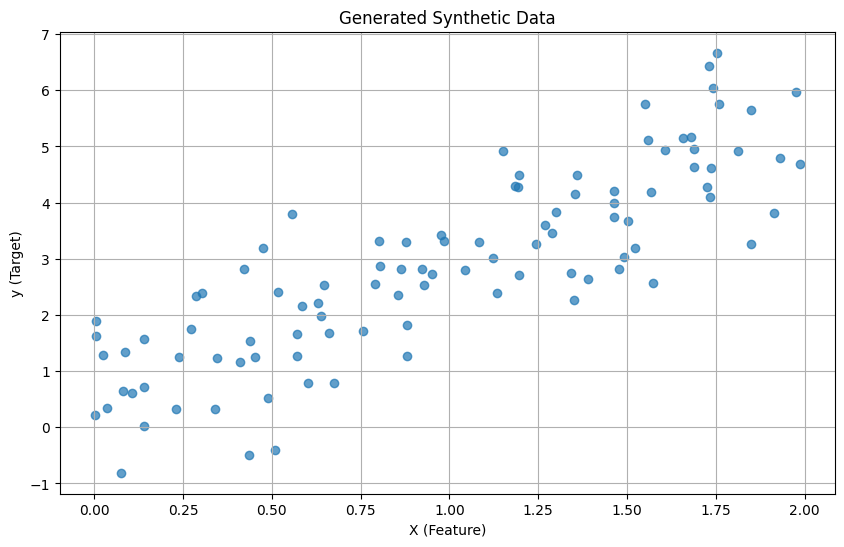

In [3]:
# Generate synthetic data
# We'll create data based on the equation y = 2x + 1 with some random noise
X = 2 * np.random.rand(100, 1)  # 100 random numbers for our feature X
y = 1 + 2 * X + np.random.randn(100, 1) # Our target y, with Gaussian noise

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.title('Generated Synthetic Data')
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')
plt.grid(True)
plt.show()

In [4]:
# Add a bias term (x₀ = 1) to each instance of X
# This allows us to use matrix multiplication to calculate predictions
X_b = np.c_[np.ones((100, 1)), X]  # Add x₀ = 1 to each instance

# Define the gradient descent function
def gradient_descent(X_b, y, theta, learning_rate, n_iterations):
    """
    Performs gradient descent to learn theta.

    Args:
        X_b (np.array): The input feature matrix with a bias term.
        y (np.array): The target values.
        theta (np.array): The initial parameters [θ₀, θ₁].
        learning_rate (float): The step size for each iteration.
        n_iterations (int): The number of iterations to perform.

    Returns:
        np.array: The learned parameters theta.
    """
    m = len(y)  # Number of training instances
    cost_history = []

    for iteration in range(n_iterations):
        # 1. Calculate predictions (hypothesis)
        predictions = X_b.dot(theta)

        # 2. Calculate the error
        errors = predictions - y

        # 3. Calculate the gradients
        gradients = 2/m * X_b.T.dot(errors)

        # 4. Update the parameters (theta)
        theta = theta - learning_rate * gradients

        # Optionally, store the cost (Mean Squared Error) for plotting
        cost = np.mean(errors**2)
        cost_history.append(cost)

    return theta, cost_history


print("Data prepared and gradient_descent function defined.")

Data prepared and gradient_descent function defined.


In [5]:
# Hyperparameters
learning_rate = 0.1
n_iterations = 1000

# Initialize theta with random values
# theta[0] is the intercept (θ₀), theta[1] is the slope (θ₁)
theta = np.random.randn(2, 1)

print(f"Initial (random) theta: \n{theta}")

# Run gradient descent to train the model
final_theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, n_iterations)

print("\n--- Training Complete ---")
print(f"Learned Intercept (θ₀): {final_theta[0][0]:.4f}")
print(f"Learned Slope (θ₁): {final_theta[1][0]:.4f}")

# Note: The true values were intercept=1 and slope=2. Our learned values should be close!

Initial (random) theta: 
[[ 1.23037844]
 [-1.21229498]]

--- Training Complete ---
Learned Intercept (θ₀): 0.5063
Learned Slope (θ₁): 2.4150


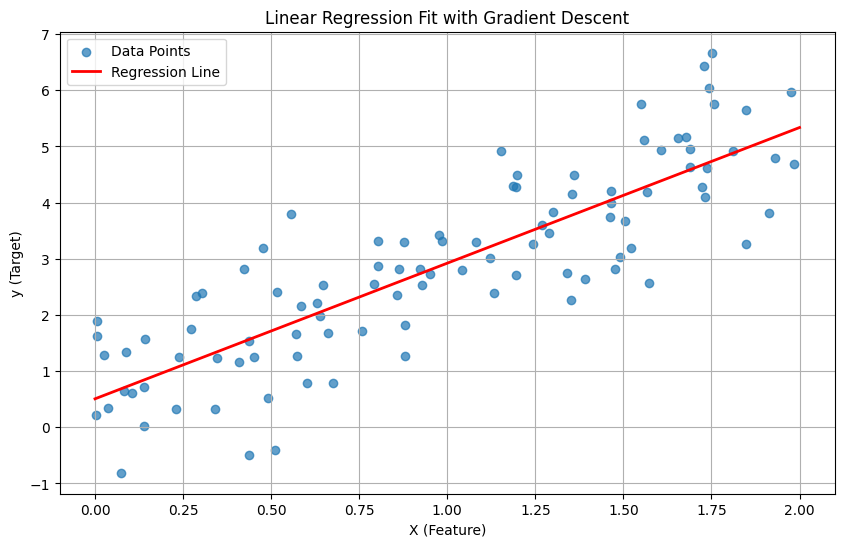

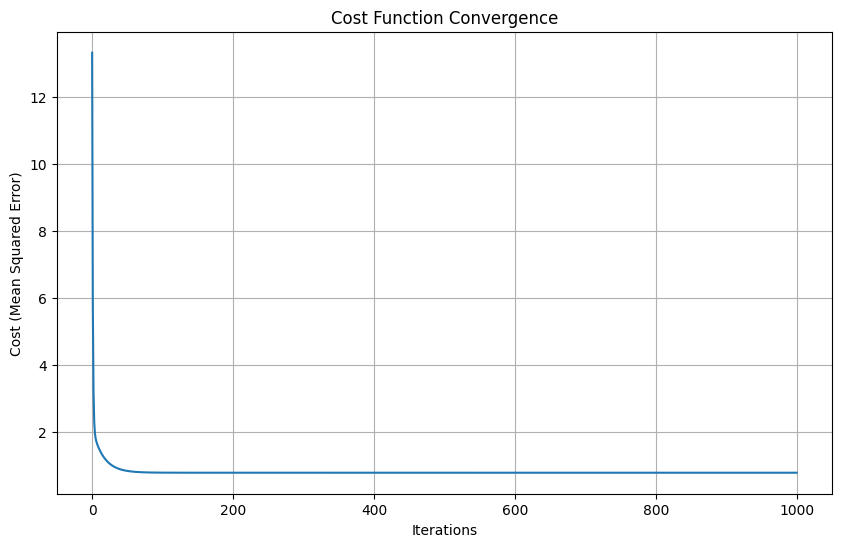

In [6]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data Points')

# Create a line of predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(final_theta)

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Regression Line")
plt.title('Linear Regression Fit with Gradient Descent')
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the cost history
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), cost_history)
plt.title('Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost (Mean Squared Error)')
plt.grid(True)
plt.show()